<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.FIVE_MIN

Setting time range between 2019-01-01 00:00:00 and 2019-01-12 00:00:00


### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))

Setting time range between 2019-01-01 00:00:00 and 2019-01-12 00:00:00
Setting time range between 2019-01-01 00:00:00 and 2019-01-12 00:00:00


In [4]:
d.data

,product,product_id
2019-01-01 00:00:00,A,1215
2019-01-01 00:05:00,D,6225
2019-01-01 00:10:00,B,8822
2019-01-01 00:15:00,B,9616
2019-01-01 00:20:00,D,7331
...,...,...
2019-01-11 23:40:00,C,7413
2019-01-11 23:45:00,C,3009
2019-01-11 23:50:00,D,2176
2019-01-11 23:55:00,B,894


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

Setting time range between 2019-01-01 00:00:00 and 2019-01-12 00:00:00
Setting time range between 2019-01-01 00:00:00 and 2019-01-12 00:00:00
Setting time range between 2019-01-01 00:00:00 and 2019-01-12 00:00:00
Setting time range between 2019-01-01 00:00:00 and 2019-01-12 00:00:00


### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

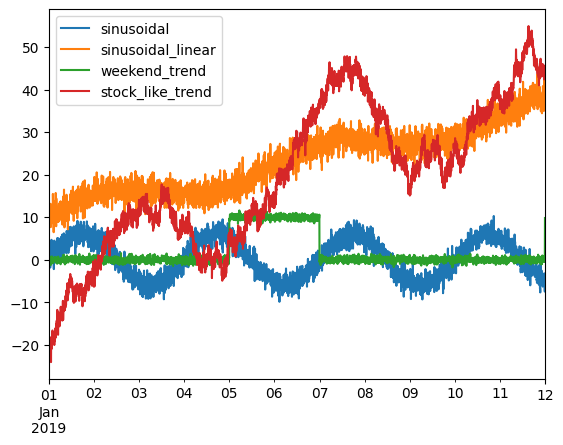

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,product,product_id,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,A,1215,1.090426,10.230999,-0.376961,-21.859966
2019-01-01 00:05:00,D,6225,3.818966,9.427242,-0.069402,-20.357632
2019-01-01 00:10:00,B,8822,1.223529,12.935180,0.075171,-19.331276
2019-01-01 00:15:00,B,9616,-0.606265,8.610805,-0.429162,-18.879518
2019-01-01 00:20:00,D,7331,0.358612,11.680314,-0.851562,-20.211058
...,...,...,...,...,...,...
2019-01-11 23:40:00,C,7413,-4.191563,42.270504,-0.515959,44.966758
2019-01-11 23:45:00,C,3009,-4.890652,37.810512,-0.202471,42.776634
2019-01-11 23:50:00,D,2176,-5.942849,40.025780,-0.226582,42.992810
2019-01-11 23:55:00,B,894,-7.482091,35.808705,-0.416031,44.439676


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,product,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,A,10.230999,-0.376961,-21.859966
2019-01-01 00:05:00,D,9.427242,-0.069402,-20.357632
2019-01-01 00:10:00,B,12.935180,0.075171,-19.331276
2019-01-01 00:15:00,B,8.610805,-0.429162,-18.879518
2019-01-01 00:20:00,D,11.680314,-0.851562,-20.211058
...,...,...,...,...
2019-01-11 23:40:00,C,42.270504,-0.515959,44.966758
2019-01-11 23:45:00,C,37.810512,-0.202471,42.776634
2019-01-11 23:50:00,D,40.025780,-0.226582,42.992810
2019-01-11 23:55:00,B,35.808705,-0.416031,44.439676


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [12]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

Setting time range between 2019-01-01 00:00:00 and 2019-01-12 01:05:00


,product,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,D,6.320934,0.091564,-20.440653
2019-01-01 00:05:00,A,9.430652,-0.333747,-20.598470
2019-01-01 00:10:00,A,12.608969,0.337068,-19.530099
2019-01-01 00:15:00,A,8.187673,-1.467143,-18.670110
2019-01-01 00:20:00,B,9.762835,-0.245317,-18.632689
...,...,...,...,...
2019-01-12 00:45:00,A,40.789844,10.457428,-20.556452
2019-01-12 00:50:00,B,38.887819,9.699142,-20.839575
2019-01-12 00:55:00,A,39.499078,9.658866,-21.434505
2019-01-12 01:00:00,C,36.330693,10.067298,-19.242468
